Problem 1. Portfolio of momentum, liquidity, and fundamental factors with dollar
neutral and sector neutral strategies. Download the daily adjusted closing price,
liquidity, and fundamental data for the stocks in constituents.csv from June 11, 2012,
through September 30, 2022. You can download this from Yahoo Finance in Python.


(a) Use the momentum, liquidity, and fundamental signals to construct the portfolio
that rebalances on the day you choose. For each factor, choose data freely from
yfinance(https://pypi.org/project/yfinance/). The portfolio should be a longshort portfolio based on the signals and neutral strategies. Use the weighting
strategy freely. (hint. A sector neutral strategy would be to determine the long
short by grouping the sector. If it is difficult, exclude it and solve.)


(b) Return the weights, Sharpe Ratio, and Turnover for the portfolio in (a)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import bt
%matplotlib inline


In [2]:
df = pd.read_csv("constituents.csv")
df.head(5)

Symbol                 Name       Sector
0    MMM                   3M  Industrials
1    AOS          A. O. Smith  Industrials
2    ABT  Abbott Laboratories  Health Care
3   ABBV               AbbVie  Health Care
4   ABMD              Abiomed  Health Care

In [3]:
temp = list(df.Symbol.values)
tickers = ' '.join(temp)

In [4]:
data = yf.download(tickers, start='2012-06-11', end='2022-09-30')

[*                      3%                       ]  16 of 505 completedGot error from yahoo api for ticker CERN, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*********             19%                       ]  98 of 505 completedGot error from yahoo api for ticker DISCK, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[***********           23%                       ]  116 of 505 completedGot error from yahoo api for ticker XLNX, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[****************      33%                       ]  167 of 505 completedGot error from yahoo api for ticker ANTM, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[****************      33%                       ]  169 of 505 completedGot error from yahoo api for ticker PBCT, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*****

In [100]:
price = data['Adj Close']
volume = data['Volume']

In [93]:
mom = bt.Strategy('momentum', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.SelectMomentum(50, sort_descending=True),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()])

In [94]:
mom_test = bt.Backtest(mom, price)

result = bt.run(mom_test)

In [95]:
spy = yf.download('SPY', start='2012-06-11', end='2022-09-30')

[*********************100%***********************]  1 of 1 completed


In [96]:
spy = spy['Adj Close']

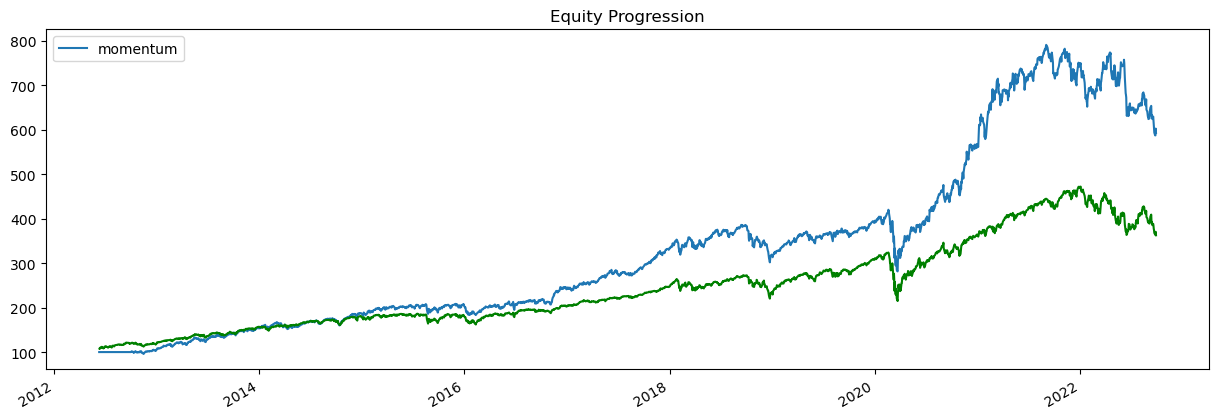

In [97]:
fig, ax = plt.subplots(figsize=(15,4))
result.plot(ax=ax)
#ax1 = ax.twinx()
ax.plot(spy, c='green')

In [98]:
result.display_monthly_returns()

  Year    Jan    Feb     Mar    Apr    May     Jun    Jul    Aug    Sep     Oct    Nov    Dec     YTD
------  -----  -----  ------  -----  -----  ------  -----  -----  -----  ------  -----  -----  ------
  2012   0      0       0      0      0       0      0      0      0      -0.51   2.6    2.66    4.79
  2013   7.99   1.43    7.22   0.78   2.83    0.21   5.34  -1.22   6.07    4.22   2.45   2.73   47.66
  2014   1.27   5.22   -3.98  -1.29   3.69    4.13  -2.54   6     -1.45    1.95   6.2    0.11   20.34
  2015   1.39   4.55    0.84  -1.63   2.88    0.09   1.29  -4.74  -0.52    5.89   0.84  -1.18    9.66
  2016  -6.33  -0.55    7.07   0.22   2.16   -0.46   2.87  -0.04   1.99   -2.39  11.94   1.44   18.17
  2017   1.07   3.33    2.75   2.67   4.61   -0.8   -0.25   1.98   3.93    5.57   5.34   1.78   36.84
  2018   4.85  -1.93    0.24  -0.33   5.98    1.16  -0.49   4.75   1.85  -10.46   1.04  -8.55   -3.26
  2019   4.66   4.08    1.67   4.26  -6.05    3.61   1.42   1.99  -1.29    0.7    

In [99]:
result.display()

Stat                 momentum
-------------------  ----------
Start                2012-06-10
End                  2022-09-29
Risk-free rate       0.00%

Total Return         492.89%
Daily Sharpe         1.00
Daily Sortino        1.56
CAGR                 18.86%
Max Drawdown         -33.01%
Calmar Ratio         0.57

MTD                  -5.88%
3m                   -8.70%
6m                   -19.61%
YTD                  -20.12%
1Y                   -18.67%
3Y (ann.)            17.39%
5Y (ann.)            15.25%
10Y (ann.)           19.50%
Since Incep. (ann.)  18.86%

Daily Sharpe         1.00
Daily Sortino        1.56
Daily Mean (ann.)    19.13%
Daily Vol (ann.)     19.09%
Daily Skew           -0.64
Daily Kurt           8.85
Best Day             9.10%
Worst Day            -11.49%

Monthly Sharpe       1.17
Monthly Sortino      2.19
Monthly Mean (ann.)  18.75%
Monthly Vol (ann.)   15.98%
Monthly Skew         -0.18
Monthly Kurt         2.21
Best Month           17.75%
Worst Month       